In [5]:
#Import prerequisite libraries to use for this script
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Save the file path and name to the current EPF synteny cluster alignment in question
fasta_file_path='C:/[your directory here]/AtEPFL8_SyntenyGroup_CDS_alignment_1.fsa'


####################################>>>
# Import multi-fasta into Python and store Gene names and alignment sequences as two lists: 'fasta headers' & 'fasta sequences'
####################################>>>

fasta_headers = []
fasta_seqs = []

def unleaf_interleaved_fasta(interleaved_file):
    with open(interleaved_file, 'r') as infile:
        fasta_seq = ''
        for line in infile:
            if line.startswith('>'):
                if fasta_seq:
                    fasta_seqs.append(fasta_seq)
                    fasta_seq = ''  # Reset the sequence for the next header
                fasta_headers.append(line.split('/')[0].rstrip('\n'))
            else:
                fasta_seq += line.rstrip('\n')

        # Append the last sequence after the loop
        if fasta_seq:
            fasta_seqs.append(fasta_seq)

    return fasta_headers, fasta_seqs

fasta_headers, fasta_seqs = unleaf_interleaved_fasta(fasta_file_path)


###### fasta_seqs[0:5]

In [7]:

#Provide the Beta-domain start postion (Python begins counting at zero so this is generally 1 less than what you'd see listed in an alignment file
B_start=363

#Provide the Beta-domain stop position
B_stop=723


####################################>>>
# Use indexing of B_start and B_stop to extract out the subalignment of the beta domain for each sequence in the multi-fasta
####################################>>>

B_domain=[]

for seq in fasta_seqs:
    B_domain.append(seq[B_start:B_stop])



In [8]:
#Print B_domain to ensure the right region was extracted
B_domain

['GTGATAGGTTCACGGCCTCCTTTGTGTGCAAACAAGTGCATGAGTTGCAACCCTTGCATGGCTGCTTTGGTA---GTTCCTCCACAT------------------------------------------------------------------------------------CAAAGGAGTCGTACTGCATCACTATGGCAAGAA---GAACAACAAGATGAAAGCTATTATCCCCTCTCCTGGAAATGCAAATGTGGGAAT---AAACTCTTCCACCCTTGA------------------------------------------------------------------------------',
 'GTCTTGGGCTCAAGGCCTCCTTTGTGTGTGAACAAGTGCTTGACTTGTAGGCCTTGCATGGCTACTTTGGTA------ATTCCACCC------CATATG------------------------------------------------------------------------AAGAGCAGTACTAAAGCAACATCACAGCAGGAA---GATGAG---------AGCTATTATCTTCTCTCATGGAAATGCAGATGTGGGAAT---AAACTCTTCCAGCCTTGA------------------------------------------------------------------------------',
 'CGGATTGGATCAAGGCCGCCGAGATGTGAAAGGAGGTGCAGTTCATGTGGTCATTGTGAGGCAGTTCAAATGCCAGCAGTCCCACAA------GATGGA---------AATGGAAGAAGACAC---------------TCTTCC---------------------------AAGGTCTCTACAATCAGTTCC---AGAGCTGCA---GACACT------TCCAACTACAAGCCCATGAGCTGGAAATGCAAATGTGGGGAT---ATGA

In [9]:

#Provide an output path and file name to save the B_domain alignment as and where
out_path='C:/[your directory here]/AtEPFL8_SyntenyGroup_CDS_Bd.fasta'


####################################>>>
# Write out the Beta-domain subalignment as a multi-fasta after converting back into a text string, 'domain out'
####################################>>>


domain_out=''
for i in range(len(fasta_headers)):
    domain_out=domain_out+fasta_headers[i]+'\n'+B_domain[i]+'\n'
    
domain_out

with open(out_path, 'w') as file:
    # Write the string to the file
    file.write(domain_out)

In [4]:
####################################>>>
# Build a bulk PyMOL multi-PDB alignment script which can be run at once from the command line terminal at the bottom
####################################>>>
#SWISS MODEL STEPS
import os
import re
import numpy as np

SWISS_model_PDB_directory='C:/[your directory here]/EPF8 PDB Files'

EPF_PDB_Dir=os.listdir(SWISS_model_PDB_directory)

r = re.compile(".*.pdb")
EPF_PDBs=newlist = list(filter(r.match, EPF_PDB_Dir)) 

EPF_PDBs=np.sort(EPF_PDBs)

bulk_PDB_align_pymol_script='cd '+SWISS_model_PDB_directory+'\n\nloadall *.pdb\n\n'

#This WILL cause an ERROR, that is intended.

for PDB in EPF_PDBs:
    bulk_PDB_align_pymol_script=bulk_PDB_align_pymol_script+'extra_fit *, '+PDB.split('.pdb')[0]+', \ \n   method=super, \ \n   cycles=5, \ \n   cutoff=2.0, \ \n   mobile_state=-1, \ \n   target_state=-1 \n\n'

bulk_PDB_align_pymol_script

with open(SWISS_model_PDB_directory+'GarbageTestEPF8_Bulk_PyMOL_align.txt', 'w') as file:
    # Write the string to the file
    file.write(bulk_PDB_align_pymol_script)

<>:23: SyntaxWarning: invalid escape sequence '\ '
<>:23: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Emili\AppData\Local\Temp\ipykernel_25328\4285893163.py:23: SyntaxWarning: invalid escape sequence '\ '
  bulk_PDB_align_pymol_script=bulk_PDB_align_pymol_script+'extra_fit *, '+PDB.split('.pdb')[0]+', \ \n   method=super, \ \n   cycles=5, \ \n   cutoff=2.0, \ \n   mobile_state=-1, \ \n   target_state=-1 \n\n'


In [13]:
import pandas as pd
import numpy as np

#Read in the PyMOL PDB alignment w/ RMSD text file for a given EPF synteny cluster

cur_cluster='1'
#Read in the PyMOL PDB alignment w/ RMSD text file for a given EPF synteny cluster
PDB_align_RMSDs='C:/[your directory here]/EPF8 RSMD.txt'
####################################>>>
# Read in the PDB alignment text-file and convert it’s RMSD information into a 2-dimensional distance matrix ‘Dist_mat’
####################################>>>
with open(PDB_align_RMSDs, 'r') as infile:
    EPF_PDB_Dir=os.listdir(SWISS_model_PDB_directory)
    r = re.compile(".*.pdb")
    EPF_PDBs=newlist = list(filter(r.match, EPF_PDB_Dir))
    print(len(EPF_PDBs))
    row_list=[]
    col_list=[]
    val_list=[]
    content=False
    for line in infile:
        if line.startswith('PyMOL>loadall *.pdb'):
            print('Initializing run...')
            content=True
        elif (content==True) & (line.startswith('PyMOL>extra_fit')):
            print('   New alignment identified')
            rowname=line.split(', ')[1]
            row_index=int(rowname.split('_')[0])-1
            col_indices=[]
            col_values=[]
            print(rowname)
        elif (content==True) & (not line.startswith('PyMOL')) & (not line.startswith(' Loading')):
            colname, col_RMSD = line.split('=   ')
            row_list.append(rowname)
            col_list.append(colname.split(' RMSD')[0])
            val_list.append(float(col_RMSD.split(' (')[0]))

Prot_names=np.unique(row_list)
Dist_mat=np.zeros([len(Prot_names),len(Prot_names)])
for i in range(len(row_list)):
    cr=np.where(Prot_names==row_list[i])[0][0]
    cc=np.where(Prot_names==col_list[i])[0][0]
    Dist_mat[cr,cc]=val_list[i]
Dist_mat=pd.DataFrame(Dist_mat, index = Prot_names, columns = Prot_names)
Dist_mat


66
Initializing run...
   New alignment identified
034_Litul.15G078300.1_EPF8_Bd
   New alignment identified
035_Litul.01G159900.1_EPF8b_Bd
   New alignment identified
036_Litul.17G037600.1_EPF8c_Bd
   New alignment identified
037_Litul.19G073000.1_EPF8d_Bd
   New alignment identified
038_Sobic.002G025300.1_EPF8_Bd
   New alignment identified
039_Sevir.2G030800.1_EPF8_Bd
   New alignment identified
040_Bradi1g10080.1_EPF8_Bd
   New alignment identified
041_Bradi1g57800.1_EPF8b_Bd
   New alignment identified
042_HORVU.MOREX.r3.2HG0154200.1
   New alignment identified
043_HORVU.MOREX.r3.2HG0172980.1_EPF8b_Bd
   New alignment identified
044_LOC_Os07g04020.1_EPF8_Bd
   New alignment identified
045_AgateH2.08G043700.1_EPF8a_Bd
   New alignment identified
046_AgateH2.26G004900.1_EPF8b_Bd
   New alignment identified
047_AgateH2.05G290500.1_EPF8c_Bd
   New alignment identified
048_AgateH2.08G220900.1_EPF8d_Bd
   New alignment identified
049_Godar.A05G017500.1_EPF8a_Bd
   New alignment identifi

,034_Litul.15G078300.1_EPF8_Bd,035_Litul.01G159900.1_EPF8b_Bd,036_Litul.17G037600.1_EPF8c_Bd,037_Litul.19G073000.1_EPF8d_Bd,038_Sobic.002G025300.1_EPF8_Bd,039_Sevir.2G030800.1_EPF8_Bd,040_Bradi1g10080.1_EPF8_Bd,041_Bradi1g57800.1_EPF8b_Bd,042_HORVU.MOREX.r3.2HG0154200.1,043_HORVU.MOREX.r3.2HG0172980.1_EPF8b_Bd,...,090_Migut.L00437.1_EPF8b_Bd,091_Migut.N02810.1_EPF8c_Bd,092_Migut.D01070.1_EPF8d_Bd,093_Migut.C00429.1_EPF8e_Bd,094_Oeu061814.1_EPF8a_Bd,095_Oeu013364.1_EPF8b_Bd,096_Solyc02T002712.1_EPF8a_Bd,097_Solyc04T002517.1_EPF8b_Bd,098_HanXRQChr11g0323831_EPF8_Bd,099_Zm00001eb055900_T001_EPF10_Bd
034_Litul.15G078300.1_EPF8_Bd,0.000,8.620,1.020,0.897,1.009,1.010,1.482,1.005,1.014,3.580,...,0.986,4.269,6.064,0.935,0.960,0.962,0.990,0.972,0.960,5.353
035_Litul.01G159900.1_EPF8b_Bd,8.620,0.000,0.380,0.300,0.657,0.658,1.165,0.598,0.527,0.568,...,0.318,0.418,0.245,0.333,0.290,0.289,0.284,0.337,0.396,0.757
036_Litul.17G037600.1_EPF8c_Bd,1.020,0.380,0.000,1.065,0.946,0.537,0.379,0.699,3.114,0.791,...,0.320,0.392,0.398,0.270,2.325,0.265,0.296,0.640,8.532,0.609
037_Litul.19G073000.1_EPF8d_Bd,0.897,0.300,1.065,0.000,3.240,0.710,0.398,0.445,0.423,0.846,...,0.232,0.327,13.354,0.116,0.207,0.208,0.208,0.563,0.347,0.710
038_Sobic.002G025300.1_EPF8_Bd,1.009,0.657,0.946,3.240,0.000,0.014,0.572,0.406,0.242,1.013,...,0.578,0.450,1.460,0.415,0.460,0.467,0.502,3.232,0.399,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
095_Oeu013364.1_EPF8b_Bd,0.962,0.289,0.265,0.208,0.467,0.468,0.432,0.648,5.555,0.723,...,0.198,0.266,0.308,0.187,0.020,0.000,0.110,0.421,10.139,0.543
096_Solyc02T002712.1_EPF8a_Bd,0.990,0.284,0.296,0.208,0.502,0.502,0.927,0.696,0.455,0.714,...,0.241,0.299,2.393,0.200,0.107,0.110,0.000,3.907,3.829,2.495
097_Solyc04T002517.1_EPF8b_Bd,0.972,0.337,0.640,0.563,3.232,3.225,0.428,0.917,0.639,0.845,...,0.424,0.530,0.529,0.431,0.399,0.421,3.907,0.000,0.650,0.761
098_HanXRQChr11g0323831_EPF8_Bd,0.960,0.396,8.532,0.347,0.399,0.411,1.076,0.472,7.510,0.834,...,0.435,0.254,11.612,0.193,10.140,10.139,3.829,0.650,0.000,0.719


In [14]:
#Print Dist_mat to ensure this operation was successful
Dist_mat

,034_Litul.15G078300.1_EPF8_Bd,035_Litul.01G159900.1_EPF8b_Bd,036_Litul.17G037600.1_EPF8c_Bd,037_Litul.19G073000.1_EPF8d_Bd,038_Sobic.002G025300.1_EPF8_Bd,039_Sevir.2G030800.1_EPF8_Bd,040_Bradi1g10080.1_EPF8_Bd,041_Bradi1g57800.1_EPF8b_Bd,042_HORVU.MOREX.r3.2HG0154200.1,043_HORVU.MOREX.r3.2HG0172980.1_EPF8b_Bd,...,090_Migut.L00437.1_EPF8b_Bd,091_Migut.N02810.1_EPF8c_Bd,092_Migut.D01070.1_EPF8d_Bd,093_Migut.C00429.1_EPF8e_Bd,094_Oeu061814.1_EPF8a_Bd,095_Oeu013364.1_EPF8b_Bd,096_Solyc02T002712.1_EPF8a_Bd,097_Solyc04T002517.1_EPF8b_Bd,098_HanXRQChr11g0323831_EPF8_Bd,099_Zm00001eb055900_T001_EPF10_Bd
034_Litul.15G078300.1_EPF8_Bd,0.000,8.620,1.020,0.897,1.009,1.010,1.482,1.005,1.014,3.580,...,0.986,4.269,6.064,0.935,0.960,0.962,0.990,0.972,0.960,5.353
035_Litul.01G159900.1_EPF8b_Bd,8.620,0.000,0.380,0.300,0.657,0.658,1.165,0.598,0.527,0.568,...,0.318,0.418,0.245,0.333,0.290,0.289,0.284,0.337,0.396,0.757
036_Litul.17G037600.1_EPF8c_Bd,1.020,0.380,0.000,1.065,0.946,0.537,0.379,0.699,3.114,0.791,...,0.320,0.392,0.398,0.270,2.325,0.265,0.296,0.640,8.532,0.609
037_Litul.19G073000.1_EPF8d_Bd,0.897,0.300,1.065,0.000,3.240,0.710,0.398,0.445,0.423,0.846,...,0.232,0.327,13.354,0.116,0.207,0.208,0.208,0.563,0.347,0.710
038_Sobic.002G025300.1_EPF8_Bd,1.009,0.657,0.946,3.240,0.000,0.014,0.572,0.406,0.242,1.013,...,0.578,0.450,1.460,0.415,0.460,0.467,0.502,3.232,0.399,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
095_Oeu013364.1_EPF8b_Bd,0.962,0.289,0.265,0.208,0.467,0.468,0.432,0.648,5.555,0.723,...,0.198,0.266,0.308,0.187,0.020,0.000,0.110,0.421,10.139,0.543
096_Solyc02T002712.1_EPF8a_Bd,0.990,0.284,0.296,0.208,0.502,0.502,0.927,0.696,0.455,0.714,...,0.241,0.299,2.393,0.200,0.107,0.110,0.000,3.907,3.829,2.495
097_Solyc04T002517.1_EPF8b_Bd,0.972,0.337,0.640,0.563,3.232,3.225,0.428,0.917,0.639,0.845,...,0.424,0.530,0.529,0.431,0.399,0.421,3.907,0.000,0.650,0.761
098_HanXRQChr11g0323831_EPF8_Bd,0.960,0.396,8.532,0.347,0.399,0.411,1.076,0.472,7.510,0.834,...,0.435,0.254,11.612,0.193,10.140,10.139,3.829,0.650,0.000,0.719


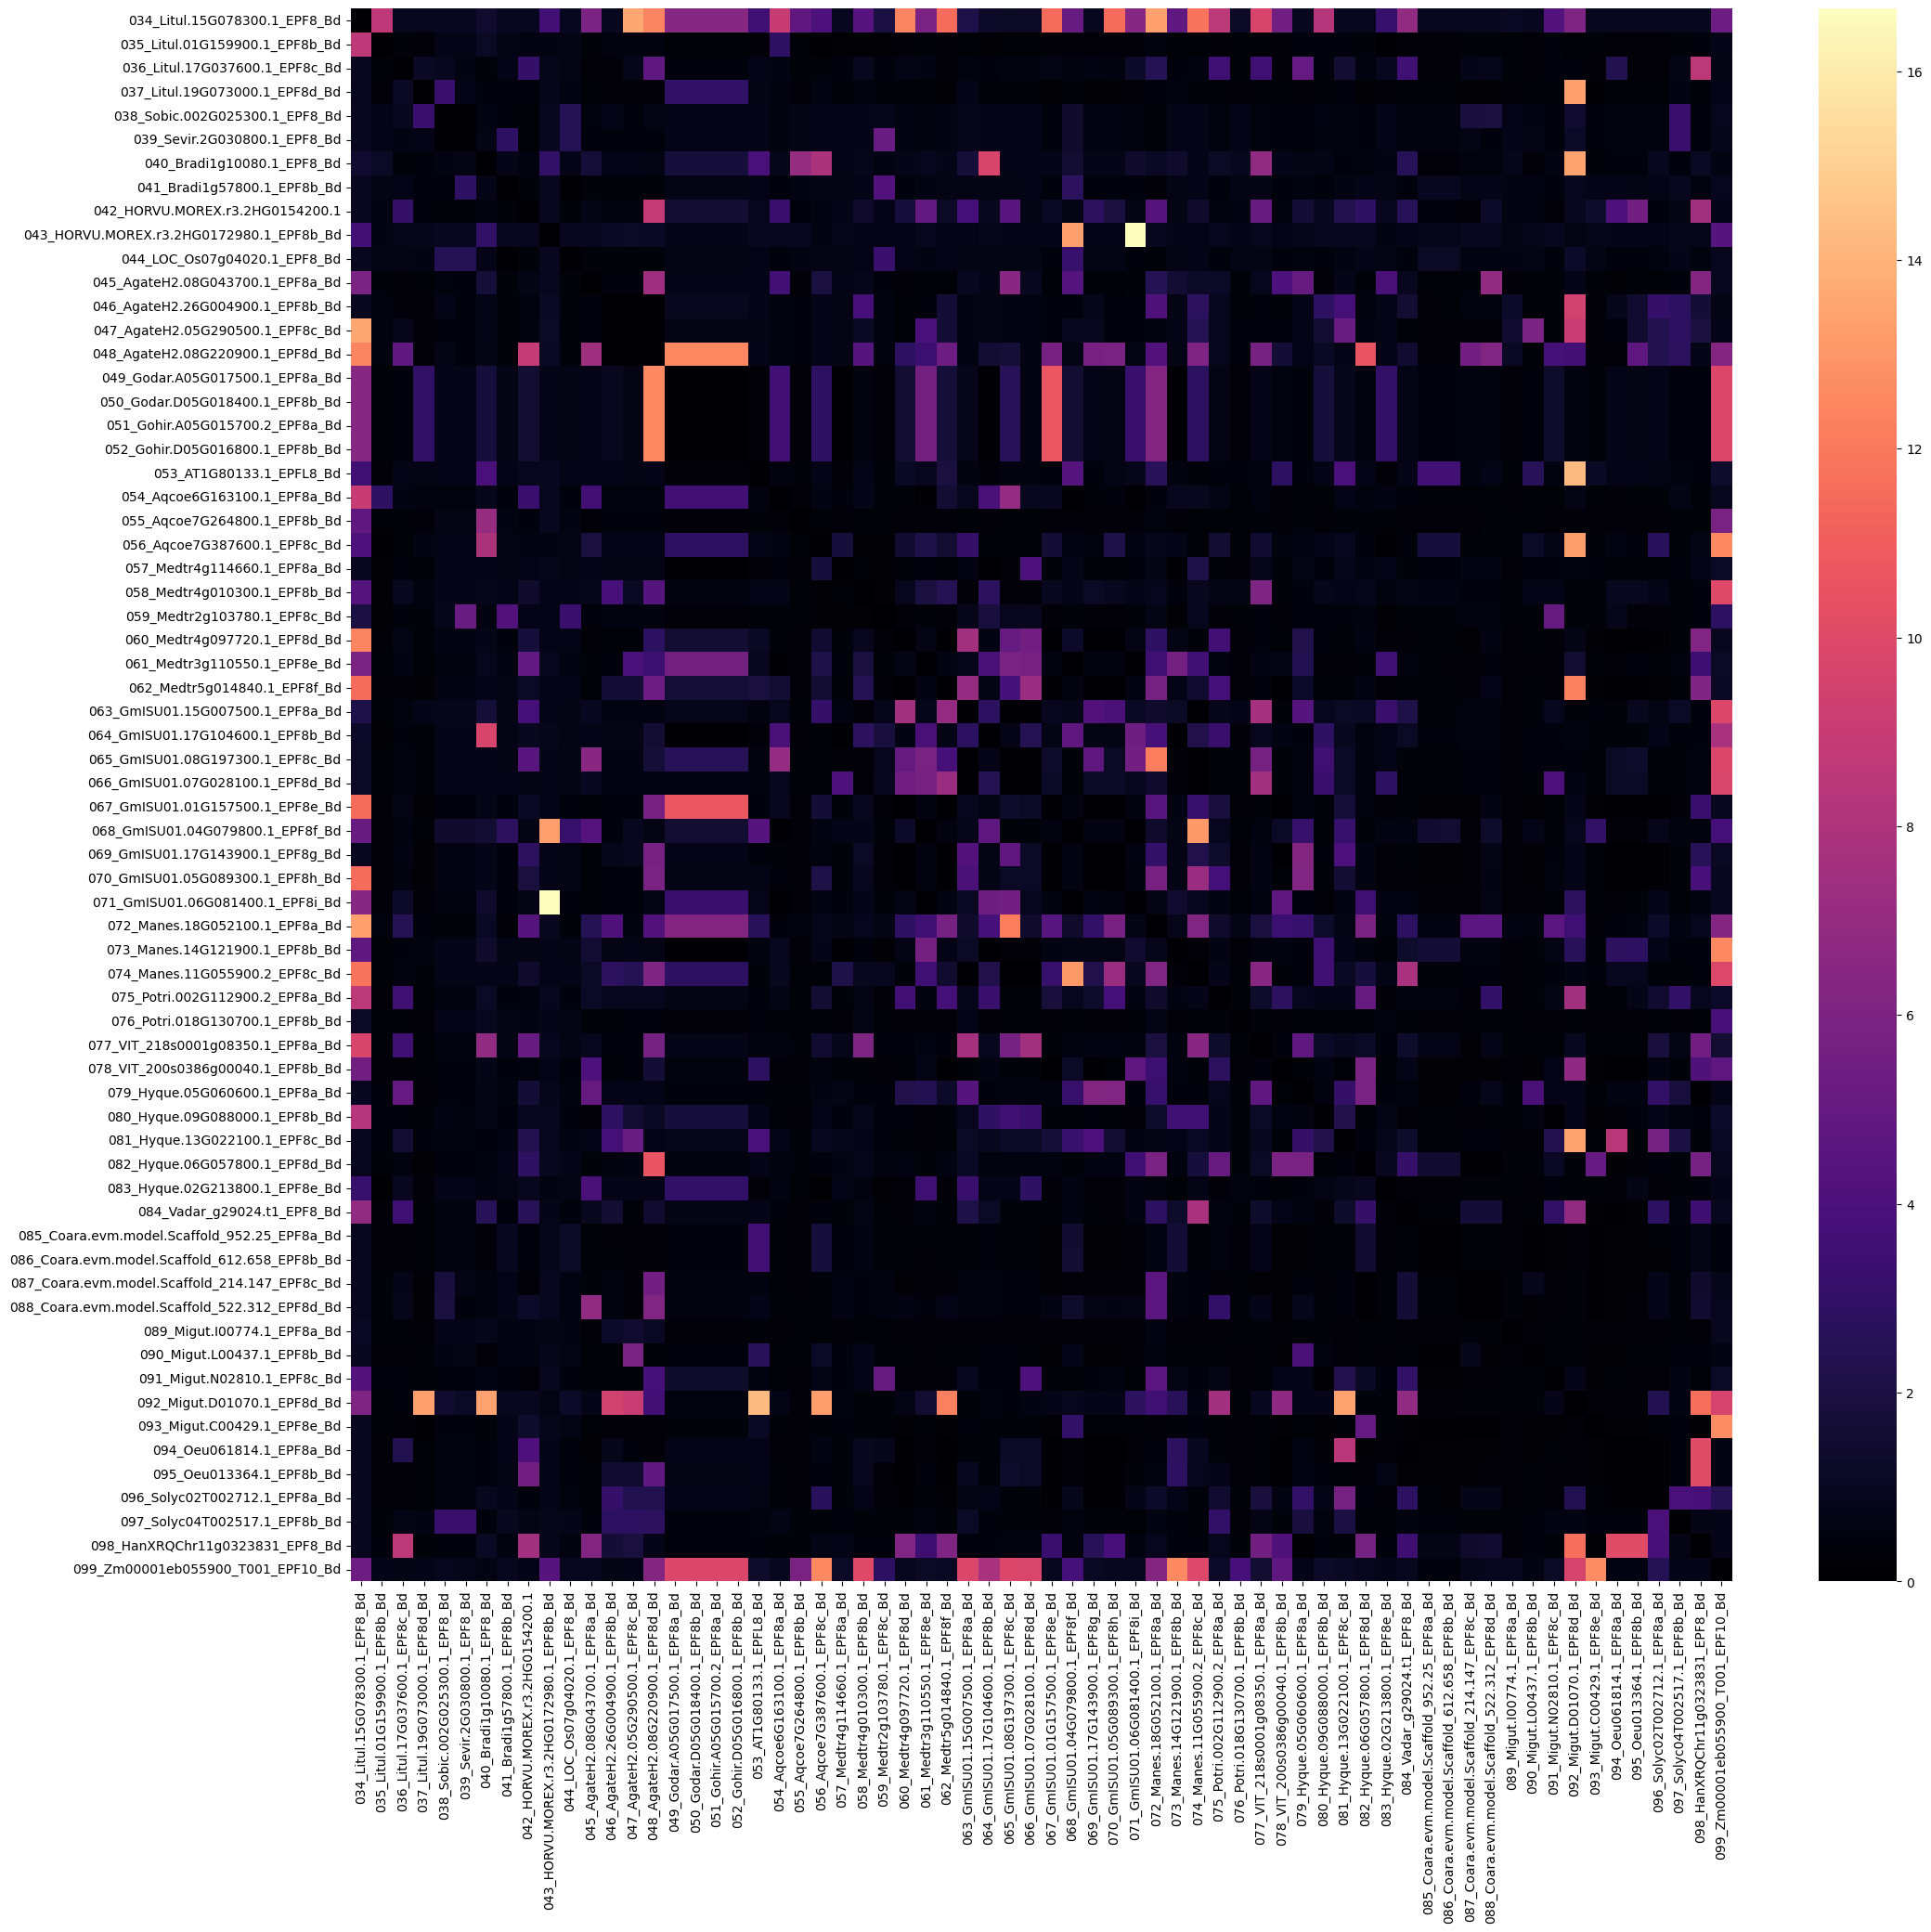

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

####################################>>>
# Visualize the Dist_mat information as a heatmap of protein-protein structural distances and save this graph as a png file
####################################>>>

fig, ax = plt.subplots(figsize=(24,22))
sns.heatmap(Dist_mat, annot=False, cmap="magma")

plt.savefig('C:/[your directory here]/EPF8_Bdomain_align_distances_heatmap.png')
plt.show()
